<a href="https://colab.research.google.com/github/Shiksha-Yadav/WOC/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

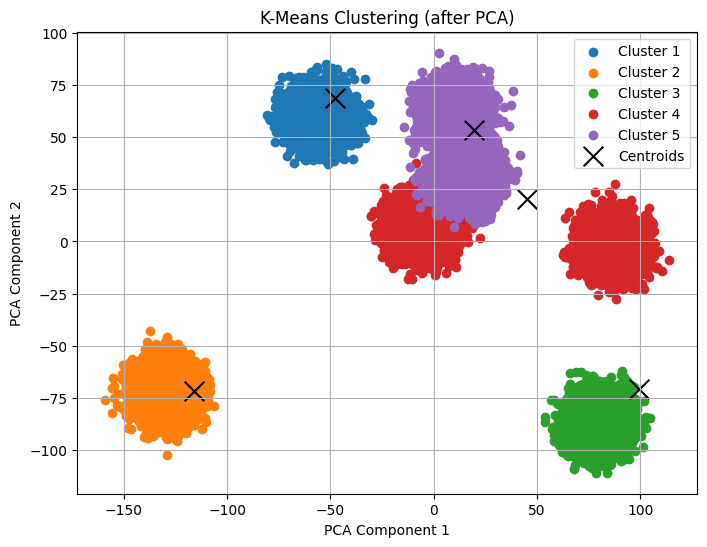

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def initialize_centroids(X, K):
  random_indices = np.random.choice(len(X), size=K, replace=False)
  return X[random_indices]

def assign_clusters(x, centroids):
  distances = np.linalg.norm(x[:, np.newaxis] - centroids, axis=2)  # Compute distances to all centroids
  return np.argmin(distances, axis=1)

def update_centroids(X, labels, K):
  new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])
  return new_centroids

def k_means(X, K, max_iters=100, tol=1e-4):
  centroids = initialize_centroids(X, K)
  for i in range(max_iters):
    labels = assign_clusters(X, centroids)
    new_centroids = update_centroids(X, labels, K)
    if np.all(np.abs(new_centroids - centroids) < tol):
      break
    centroids = new_centroids
  return centroids, labels


def pca(X, n_components=2):

    # Step 1: Center the data by subtracting the mean of each feature
    X_centered = X - np.mean(X, axis=0)

    # Step 2: Calculate the covariance matrix
    covariance_matrix = np.cov(X_centered.T)

    # Step 3: Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Step 4: Sort the eigenvectors by eigenvalue in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvectors_sorted = eigenvectors[:, sorted_indices]

    # Step 5: Select the top n_components eigenvectors
    eigenvectors_top = eigenvectors_sorted[:, :n_components]

    # Step 6: Project the data onto the new eigenvectors
    X_reduced = np.dot(X_centered, eigenvectors_top)

    return X_reduced

# Step 3: Plotting Function
def plot_clusters(X, centroids, labels, K):
    """Plot the clusters and centroids after reducing dimensionality using PCA."""
    # Apply PCA to reduce the data and centroids to 2D for visualization
    X_reduced = pca(X, n_components=2)
    centroids_reduced = pca(centroids, n_components=2)

    plt.figure(figsize=(8, 6))

    # Plot each cluster in different colors
    for k in range(K):
        # Use X_reduced directly, as it's now derived from 'x'
        plt.scatter(X_reduced[labels == k, 0], X_reduced[labels == k, 1], label=f'Cluster {k+1}')

    # Plot centroids
    plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], c='black', marker='x', s=200, label='Centroids')

    plt.title('K-Means Clustering (after PCA)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()



if __name__ == "__main__":
  df1 = pd.read_csv("unsupervised_data.csv")
  x= df1.iloc[1:,1:].values
  k=5
  centroids, labels= k_means(x, k)
  # pass x, not df1 into plot_clusters
  plot_clusters(x, centroids, labels, k)